In [ ]:
# version 1.02
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # разделитель для выборки
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB # наивный байесовский классификатор

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score # метрика для оценивая точности модели
from sklearn.metrics import confusion_matrix # метрика для оценивая точности модели с помощью heatmap


import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.rcParams['figure.figsize'] = [10, 6]  
plt.rcParams['figure.autolayout'] = True   

## Пингвины  
В нашем датасете имеется 3 вида пинвинов.  
Задача которую можно решить с помощью ML - определить к какому виду относится пингвин, исходя из имеющихся данных.
Данный ноутбук будет направлен на общее ознакомление применения методов ML.  

# Adelie
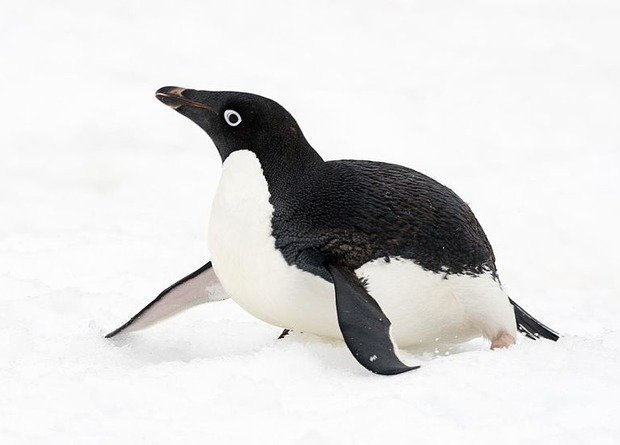

# Gentoo
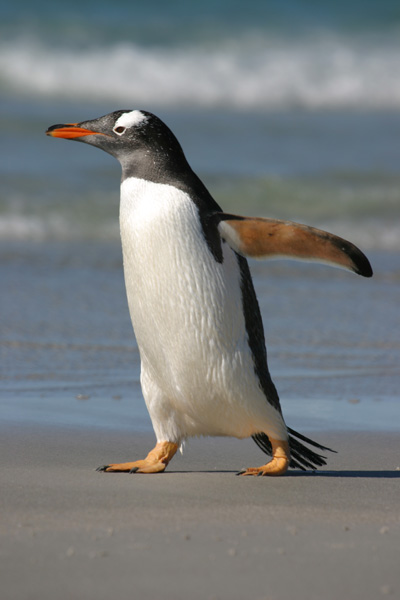

# Chinstrap
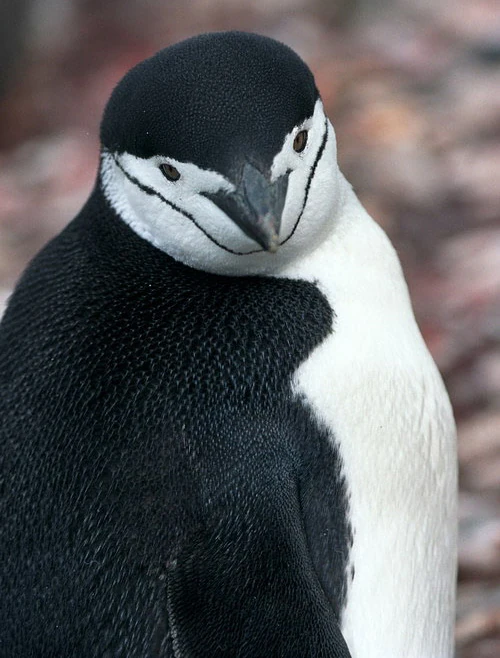

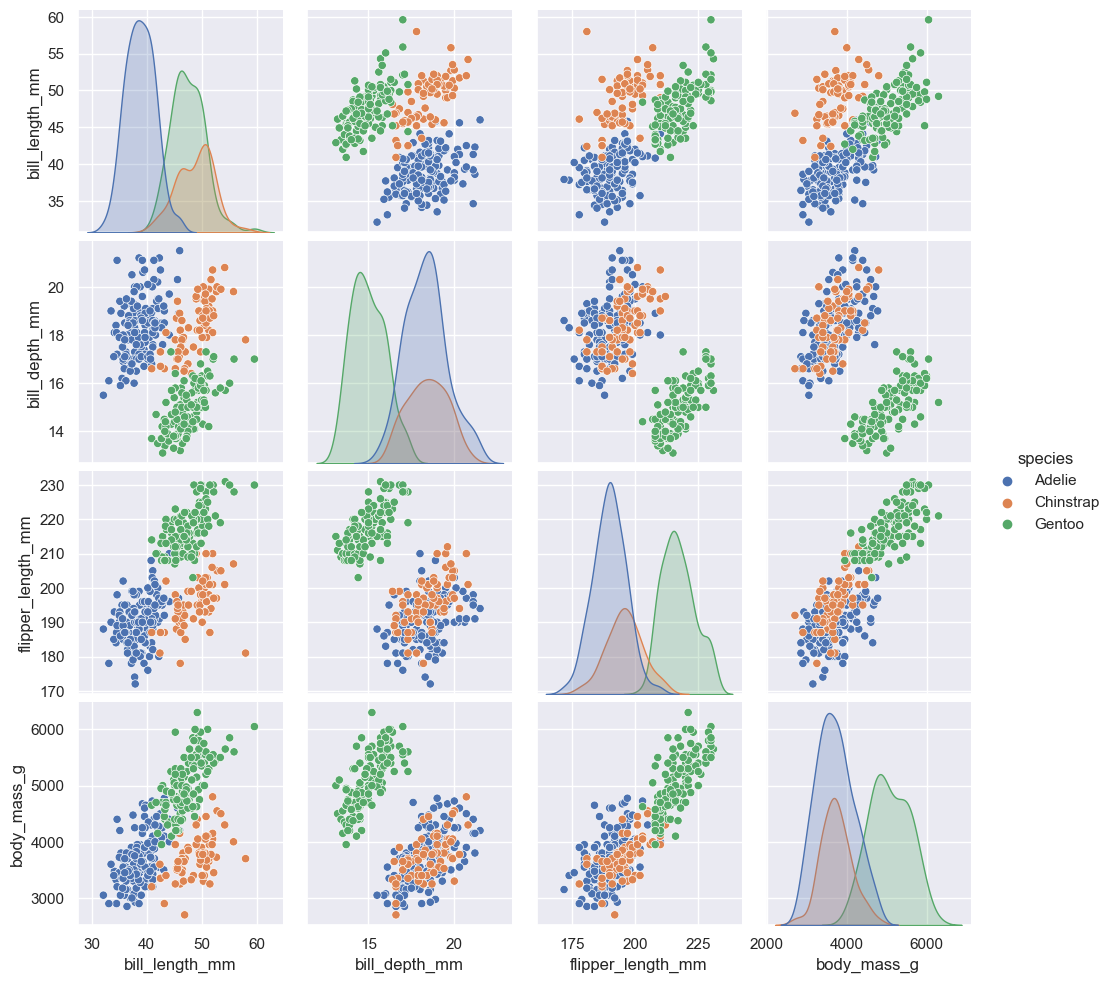

In [2]:
penguins = sns.load_dataset('penguins') # выгружаем датасет с Пингвинами

X_viz = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']] # данные для визуализации
sns.pairplot(data=X_viz, hue='species') # строим набор корреляций между основными характеристиками пинвинов, выделяем вид

# Подготовка данных
Категориальные переменные необходимо закодировать, в данном случае, у нас есть столбец с островом, на котором обитает пингвин, для обучение модели название конкретного острова не говорит о чём-либо, однако, если кодировать острова в числовые переменные, то модель может обнаружить скрытые от глаз закономерности

In [3]:
from sklearn.preprocessing import OneHotEncoder # кодировка категориальных переменных

Encoder = OneHotEncoder(sparse_output=False, dtype=int) # создаём экземпляр модели
encode_matrix = Encoder.fit_transform(penguins[['island']]) # кодируем острова

columns = Encoder.get_feature_names_out(['island']) # получем название закодированного столбца

df_enc = pd.DataFrame(encode_matrix, columns=columns) # строим фреймДанных
peng_fr = penguins[['species',  'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]
research_data = pd.concat([peng_fr, df_enc], axis=1) # фичи для анализа + новая фича с островами
research_data.dropna(inplace=True) # удаляем пустые значения
research_data.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1


# Сепарация данных  
  
  
**Данные разделены на:**

X — признаки (features): все колонки, на основе которых модель будет учиться предсказывать

y — целевая переменная (target): колонка, которую модель должна научиться предсказывать

In [4]:
X = research_data.drop('species', axis=1) # Признаки (Features)
Y = research_data['species'] # Целевая переменная (Target)

# Обучение с учителем  
Делим данные на две части - тренировочные(для обучения модели) и проверочные(для тестирования модели)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, # разбиваем на тренерочную и тестовую выборки
                                                    random_state=42, stratify=Y) 

from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

model = GaussianNB() # создаем экземпляр модели
model.fit(X_train, Y_train)

Y_res1 = model.predict(X_test)

In [6]:
scores = cross_val_score(model, X, Y, cv=5)

print(f'''Точность модели(5 выборок): {np.mean(scores)},
Стандартное отлокнение: {np.std(scores)}''')
print(f'Точность, одна выборка: {accuracy_score(Y_res1, Y_test)}')

Точность модели(5 выборок): 0.839087809036658,
Стандартное отлокнение: 0.09506000088326835
Точность, одна выборка: 0.8686131386861314


<Axes: >

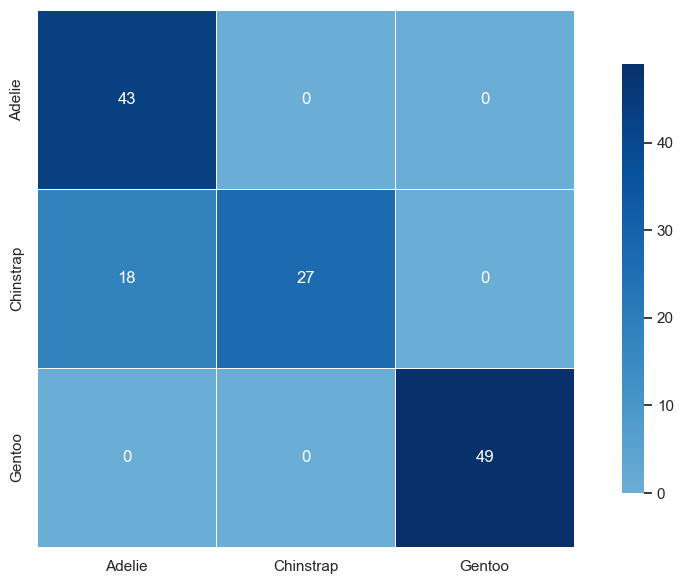

In [7]:
species = research_data.species.unique()
mat = confusion_matrix(Y_res1, Y_test)

sns.heatmap(mat, 
            annot=True,
            cmap='Blues',
            center=0,
            square=True,
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'shrink': 0.8},
            xticklabels=species,
            yticklabels=species) 

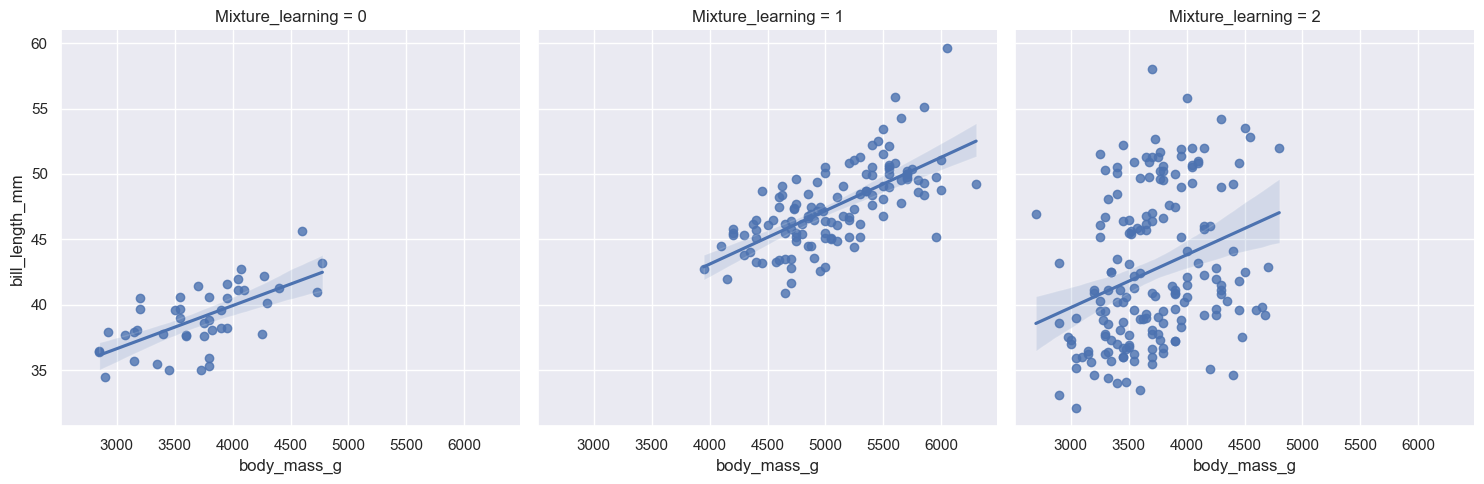

In [8]:
from sklearn.mixture import GaussianMixture
Mixture = GaussianMixture(n_components=3)
Mixture.fit(X)
groups = Mixture.predict(X)
research_data['Mixture_learning'] = groups
sns.lmplot(research_data, x='body_mass_g', y='bill_length_mm', col='Mixture_learning')

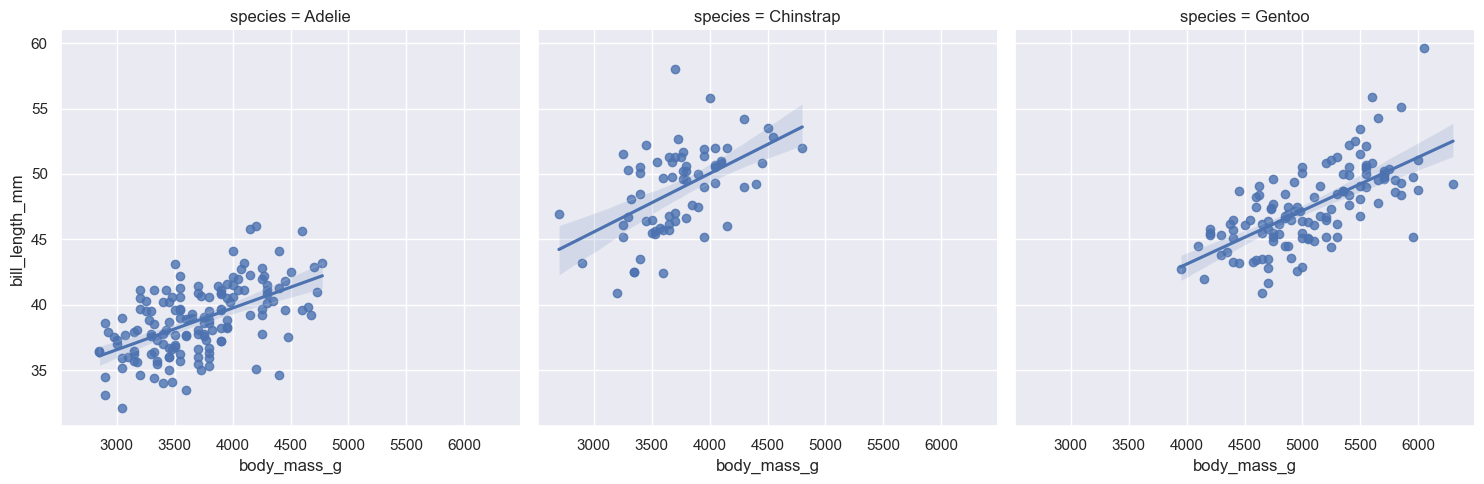

In [9]:
sns.lmplot(research_data, x='body_mass_g', y='bill_length_mm', col='species')

In [10]:
pd.crosstab(research_data.species, research_data.Mixture_learning)

Mixture_learning,0,1,2
species,,,
Adelie,44,0,107
Chinstrap,0,0,68
Gentoo,0,123,0
